In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # also for plotting

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/divvy-trips-2019/Divvy_Trips_2019_Q2.csv
/kaggle/input/divvy-trips-2019/Divvy_Trips_2019_Q3.csv
/kaggle/input/divvy-trips-2019/Divvy_Trips_2019_Q4.csv
/kaggle/input/divvy-trips-2019/Divvy_Trips_2019_Q1.csv


In [8]:
# creating a dataframe for each file
file_path_q1 = '/kaggle/input/divvy-trips-2019/Divvy_Trips_2019_Q1.csv'
file_path_q2 = '/kaggle/input/divvy-trips-2019/Divvy_Trips_2019_Q2.csv'
file_path_q3 = '/kaggle/input/divvy-trips-2019/Divvy_Trips_2019_Q3.csv'
file_path_q4 = '/kaggle/input/divvy-trips-2019/Divvy_Trips_2019_Q4.csv'

# Loading the data
data_q1 = pd.read_csv(file_path_q1)
data_q2 = pd.read_csv(file_path_q2)
data_q3 = pd.read_csv(file_path_q3)
data_q4 = pd.read_csv(file_path_q4)

# Just checking (づ｡◕‿‿◕｡)づ	
print('Everything worked yeay')

Everything worked yeay


### Data Cleasing process.

The files are divided into quarters, I'll work each quarter individually, starting with Q1. My objective here is:

- Check for duplicate entries.
- Search for and deal with missing values.
- Find outliers in the columns.
- Check and if necessary convert data to standardized values (int, string, datetime).
- Consolidate the dataset, and standardize it.

Do the above to all the four datasets.

In [10]:
# Vizualize the data
data_q1.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0


In [38]:
data_q2.head()

,01 - Rental Details Rental ID,01 - Rental Details Local Start Time,01 - Rental Details Local End Time,01 - Rental Details Bike ID,01 - Rental Details Duration In Seconds Uncapped,03 - Rental Start Station ID,03 - Rental Start Station Name,02 - Rental End Station ID,02 - Rental End Station Name,User Type,Member Gender,05 - Member Details Member Birthday Year
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,446.0,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber,Male,1975.0
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,"1,048.0",317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber,Female,1984.0
2,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,252.0,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber,Male,1990.0
3,22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,357.0,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber,Male,1993.0
4,22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,"1,007.0",202,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber,Male,1992.0


In [39]:
data_q3.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,23479388,2019-07-01 00:00:27,2019-07-01 00:20:41,3591,"1,214.0",117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992.0
1,23479389,2019-07-01 00:01:16,2019-07-01 00:18:44,5353,"1,048.0",381,Western Ave & Monroe St,203,Western Ave & 21st St,Customer,NaN,NaN
2,23479390,2019-07-01 00:01:48,2019-07-01 00:27:42,6180,"1,554.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NaN,NaN
3,23479391,2019-07-01 00:02:07,2019-07-01 00:27:10,5540,"1,503.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NaN,NaN
4,23479392,2019-07-01 00:02:13,2019-07-01 00:22:26,6014,"1,213.0",168,Michigan Ave & 14th St,62,McCormick Place,Customer,NaN,NaN


In [40]:
data_q4.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,25223640,2019-10-01 00:01:39,2019-10-01 00:17:20,2215,940.0,20,Sheffield Ave & Kingsbury St,309,Leavitt St & Armitage Ave,Subscriber,Male,1987.0
1,25223641,2019-10-01 00:02:16,2019-10-01 00:06:34,6328,258.0,19,Throop (Loomis) St & Taylor St,241,Morgan St & Polk St,Subscriber,Male,1998.0
2,25223642,2019-10-01 00:04:32,2019-10-01 00:18:43,3003,850.0,84,Milwaukee Ave & Grand Ave,199,Wabash Ave & Grand Ave,Subscriber,Female,1991.0
3,25223643,2019-10-01 00:04:32,2019-10-01 00:43:43,3275,"2,350.0",313,Lakeview Ave & Fullerton Pkwy,290,Kedzie Ave & Palmer Ct,Subscriber,Male,1990.0
4,25223644,2019-10-01 00:04:34,2019-10-01 00:35:42,5294,"1,867.0",210,Ashland Ave & Division St,382,Western Ave & Congress Pkwy,Subscriber,Male,1987.0


In [14]:
# Let's check the size of this dataset
num_lines, num_columns = data_q1.shape

# Exibindo o número de linhas e colunas
print(f'The DataFrame has {num_lines} rows and {num_columns} columns.')


The DataFrame has 365069 rows and 12 columns.


In [12]:
# Check for null values
data_q1.isnull().sum()

trip_id                  0
start_time               0
end_time                 0
bikeid                   0
tripduration             0
from_station_id          0
from_station_name        0
to_station_id            0
to_station_name          0
usertype                 0
gender               19711
birthyear            18023
dtype: int64

In [15]:
# Fill null values in 'gender' with 'Unknown'
data_q1['gender'].fillna('unknow', inplace=True)


# Fill null values in 'birthyear' with the mean
data_q1['birthyear'].fillna(data_q1['birthyear'].mean(), inplace=True)

In [13]:
# Check for duplicates
data_q1.duplicated().sum()

0

In [16]:
# Check again for null values
data_q1.isnull().sum()

trip_id              0
start_time           0
end_time             0
bikeid               0
tripduration         0
from_station_id      0
from_station_name    0
to_station_id        0
to_station_name      0
usertype             0
gender               0
birthyear            0
dtype: int64

In [17]:
# Understand the dataset after these few transfomations
data_q1.describe()

,trip_id,bikeid,from_station_id,to_station_id,birthyear
count,3.650690e+05,365069.000000,365069.000000,365069.000000,365069.000000
mean,2.196087e+07,3429.484607,198.088816,198.581123,1981.674297
std,1.271750e+05,1923.321025,153.493553,154.468304,10.964576
min,2.174244e+07,1.000000,2.000000,2.000000,1900.000000
25%,2.184876e+07,1777.000000,76.000000,76.000000,1976.000000
50%,2.196183e+07,3489.000000,170.000000,168.000000,1984.000000
75%,2.207182e+07,5157.000000,287.000000,287.000000,1990.000000
max,2.217853e+07,6471.000000,665.000000,665.000000,2003.000000


## Insights from the Descriptive Statistics above

### trip_id
- Unique identifier for each trip.
- The mean of trip identifiers seems to be evenly distributed throughout the considered period.

### bikeid
- Unique identifier for each bike used in the trips.
- There is considerable variability in bike identifiers, indicating the use of various bikes over the period.

### from_station_id and to_station_id
- Identifiers for start and end stations of the trips.
- The mean and standard deviation indicate a distribution of trips among different stations. It might be interesting to explore which stations are more frequently used.

### birthyear
- Year of birth of users.
- The mean birth year is approximately 1981, suggesting that, on average, users are around 40 years old. Most users seem to be born between the 1970s and 1990s.
- The presence of a minimum birth year of 1900 may indicate missing data or errors in data collection.
- The 25th percentile indicates that 25% of users were born before 1976, while the 75th percentile indicates that 75% of users were born before 1990.

These interpretations are preliminary and can be refined with more specific analyses and visualizations. If there are specific areas of the dataset you would like to explore further or if you have specific questions, please share, and I'll be happy to assist further!


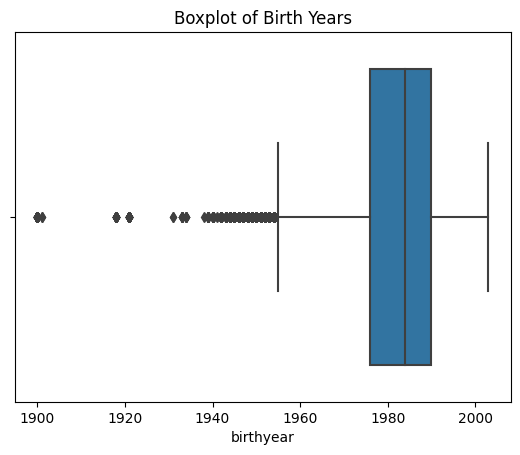

In [18]:
# Let1s visualize the 'birthyear' more closely to see if there's any outlier.
sns.boxplot(x=data_q1['birthyear'])
plt.title('Boxplot of Birth Years')
plt.show()


In [23]:
# Calculate the IQR
Q1 = data_q1['birthyear'].quantile(0.25)
Q3 = data_q1['birthyear'].quantile(0.75)
IQR = Q3 - Q1

# Identify records outside of whiskers
outliers_birthyear = data_q1[(data_q1['birthyear'] < (Q1 - 1.5 * IQR)) | (data_q1['birthyear'] > (Q3 + 1.5 * IQR))]

# Show the records
print(outliers_birthyear)

         trip_id           start_time             end_time  bikeid  \
61      21742508  2019-01-01 01:26:27  2019-01-01 01:45:56    4105   
121     21742571  2019-01-01 02:51:20  2019-01-01 03:36:56     544   
144     21742596  2019-01-01 04:05:03  2019-01-01 04:09:30     218   
167     21742619  2019-01-01 06:42:13  2019-01-01 06:50:15    5782   
180     21742632  2019-01-01 07:31:18  2019-01-01 07:51:38    5711   
...          ...                  ...                  ...     ...   
364642  22177976  2019-03-31 18:35:19  2019-03-31 18:40:44    5499   
364798  22178141  2019-03-31 19:26:59  2019-03-31 19:35:07    5103   
364890  22178269  2019-03-31 20:10:07  2019-03-31 20:15:11    1826   
364902  22178281  2019-03-31 20:15:32  2019-03-31 20:39:39    6029   
364950  22178343  2019-03-31 20:58:22  2019-03-31 21:20:35    5710   

       tripduration  from_station_id               from_station_name  \
61          1,169.0               29        Noble St & Milwaukee Ave   
121         2,7

In [31]:
# Identify unique values
unique_values_usertype = data_q1['usertype'].unique()
print(unique_values_usertype)

# Counting unique values
count_unique_values = data_q1['usertype'].value_counts()

# show the count of unique values
print(count_unique_values)

# just for organiaztion
print('*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-')

# Identify unique values
unique_values_usertype = data_q1['gender'].unique()
print(unique_values_usertype)

# Counting unique values
count_unique_values = data_q1['gender'].value_counts()

# Exiba a contagem de valores únicos
print(count_unique_values)

['Subscriber' 'Customer']
usertype
Subscriber    341906
Customer       23163
Name: count, dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
['Male' 'Female' 'unknow']
gender
Male      278440
Female     66918
unknow     19711
Name: count, dtype: int64


In [28]:
# Convert 'start_time' and 'end_time' columns to datetime format
data_q1['start_time'] = pd.to_datetime(data_q1['start_time'])
data_q1['end_time'] = pd.to_datetime(data_q1['end_time'])

# Create the 'ride_length' column
data_q1['ride_length'] = data_q1['end_time'] - data_q1['start_time']

# Create the 'day_of_week' column (1 for Sunday, 2 for Monday, etc.)
data_q1['day_of_week'] = data_q1['start_time'].dt.dayofweek + 1

# Display the first few rows of the DataFrame with the new columns
print(data_q1[['start_time', 'end_time', 'ride_length', 'day_of_week']].head())


           start_time            end_time     ride_length  day_of_week
0 2019-01-01 00:04:37 2019-01-01 00:11:07 0 days 00:06:30            2
1 2019-01-01 00:08:13 2019-01-01 00:15:34 0 days 00:07:21            2
2 2019-01-01 00:13:23 2019-01-01 00:27:12 0 days 00:13:49            2
3 2019-01-01 00:13:45 2019-01-01 00:43:28 0 days 00:29:43            2
4 2019-01-01 00:14:52 2019-01-01 00:20:56 0 days 00:06:04            2


In [33]:
# Let's confirm if everything is in place
data_q1.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,ride_length,day_of_week
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0,0 days 00:06:30,2
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0,0 days 00:07:21,2
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0,0 days 00:13:49,2
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0,0 days 00:29:43,2
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0,0 days 00:06:04,2


In [34]:
# Identify unique values
unique_values_usertype = data_q1['day_of_week'].unique()
print(unique_values_usertype)

# Counting unique values
count_unique_values = data_q1['day_of_week'].value_counts()

# show the count of unique values
print(count_unique_values)

[2 3 4 5 6 7 1]
day_of_week
4    66903
5    63047
2    61005
3    60414
1    50399
6    35302
7    27999
Name: count, dtype: int64


Ok, it looks like it's clean, now let's create an algorithm that does this with all worksheets.

In [45]:
# Some ass has named the columns in the Q2 workbook differently, let's rename them
old_to_new_mapping = {
    '01 - Rental Details Rental ID': 'trip_id',
    '01 - Rental Details Local Start Time': 'start_time',
    '01 - Rental Details Local End Time': 'end_time',
    '01 - Rental Details Bike ID': 'bikeid',
    '01 - Rental Details Duration In Seconds Uncapped': 'tripduration',
    '03 - Rental Start Station ID': 'from_station_id',
    '03 - Rental Start Station Name': 'from_station_name',
    '02 - Rental End Station ID': 'to_station_id',
    '02 - Rental End Station Name': 'to_station_name',
    'User Type': 'usertype',
    'Member Gender': 'gender',
    '05 - Member Details Member Birthday Year': 'birthyear'
}

# Rename the columns in the DataFrame
data_q2.rename(columns=old_to_new_mapping, inplace=True)

# And let's see
data_q2.head(3)

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,446.0,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber,Male,1975.0
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,"1,048.0",317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber,Female,1984.0
2,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,252.0,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber,Male,1990.0


In [46]:
# For Q2
# Fill null values in 'gender' with 'Unknown'
data_q2['gender'].fillna('unknow', inplace=True)

# Fill null values in 'birthyear' with the mean
data_q2['birthyear'].fillna(data_q2['birthyear'].mean(), inplace=True)

# Check for duplicates
data_q2.duplicated().sum()

# Convert 'start_time' and 'end_time' columns to datetime format
data_q2['start_time'] = pd.to_datetime(data_q2['start_time'])
data_q2['end_time'] = pd.to_datetime(data_q2['end_time'])

# Create the 'ride_length' column
data_q2['ride_length'] = data_q2['end_time'] - data_q2['start_time']

# Create the 'day_of_week' column (1 for Sunday, 2 for Monday, etc.)
data_q2['day_of_week'] = data_q2['start_time'].dt.dayofweek + 1

# Display the first few rows of the DataFrame with the new columns
data_q2.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,ride_length,day_of_week
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,446.0,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber,Male,1975.0,0 days 00:07:26,1
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,"1,048.0",317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber,Female,1984.0,0 days 00:17:28,1
2,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,252.0,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber,Male,1990.0,0 days 00:04:12,1
3,22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,357.0,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber,Male,1993.0,0 days 00:05:57,1
4,22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,"1,007.0",202,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber,Male,1992.0,0 days 00:16:47,1


In [43]:
# For Q3
# Fill null values in 'gender' with 'Unknown'
data_q3['gender'].fillna('unknow', inplace=True)

# Fill null values in 'birthyear' with the mean
data_q3['birthyear'].fillna(data_q3['birthyear'].mean(), inplace=True)

# Check for duplicates
data_q3.duplicated().sum()

# Convert 'start_time' and 'end_time' columns to datetime format
data_q3['start_time'] = pd.to_datetime(data_q3['start_time'])
data_q3['end_time'] = pd.to_datetime(data_q3['end_time'])

# Create the 'ride_length' column
data_q3['ride_length'] = data_q3['end_time'] - data_q3['start_time']

# Create the 'day_of_week' column (1 for Sunday, 2 for Monday, etc.)
data_q3['day_of_week'] = data_q3['start_time'].dt.dayofweek + 1

# Display the first few rows of the DataFrame with the new columns
data_q3.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,ride_length,day_of_week
0,23479388,2019-07-01 00:00:27,2019-07-01 00:20:41,3591,"1,214.0",117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992.000000,0 days 00:20:14,1
1,23479389,2019-07-01 00:01:16,2019-07-01 00:18:44,5353,"1,048.0",381,Western Ave & Monroe St,203,Western Ave & 21st St,Customer,unknow,1984.902996,0 days 00:17:28,1
2,23479390,2019-07-01 00:01:48,2019-07-01 00:27:42,6180,"1,554.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,unknow,1984.902996,0 days 00:25:54,1
3,23479391,2019-07-01 00:02:07,2019-07-01 00:27:10,5540,"1,503.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,unknow,1984.902996,0 days 00:25:03,1
4,23479392,2019-07-01 00:02:13,2019-07-01 00:22:26,6014,"1,213.0",168,Michigan Ave & 14th St,62,McCormick Place,Customer,unknow,1984.902996,0 days 00:20:13,1


In [44]:
# For Q4
# Fill null values in 'gender' with 'Unknown'
data_q4['gender'].fillna('unknow', inplace=True)

# Fill null values in 'birthyear' with the mean
data_q4['birthyear'].fillna(data_q4['birthyear'].mean(), inplace=True)

# Check for duplicates
data_q4.duplicated().sum()

# Convert 'start_time' and 'end_time' columns to datetime format
data_q4['start_time'] = pd.to_datetime(data_q4['start_time'])
data_q4['end_time'] = pd.to_datetime(data_q4['end_time'])

# Create the 'ride_length' column
data_q4['ride_length'] = data_q4['end_time'] - data_q4['start_time']

# Create the 'day_of_week' column (1 for Sunday, 2 for Monday, etc.)
data_q4['day_of_week'] = data_q4['start_time'].dt.dayofweek + 1

# Display the first few rows of the DataFrame with the new columns
data_q4.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,ride_length,day_of_week
0,25223640,2019-10-01 00:01:39,2019-10-01 00:17:20,2215,940.0,20,Sheffield Ave & Kingsbury St,309,Leavitt St & Armitage Ave,Subscriber,Male,1987.0,0 days 00:15:41,2
1,25223641,2019-10-01 00:02:16,2019-10-01 00:06:34,6328,258.0,19,Throop (Loomis) St & Taylor St,241,Morgan St & Polk St,Subscriber,Male,1998.0,0 days 00:04:18,2
2,25223642,2019-10-01 00:04:32,2019-10-01 00:18:43,3003,850.0,84,Milwaukee Ave & Grand Ave,199,Wabash Ave & Grand Ave,Subscriber,Female,1991.0,0 days 00:14:11,2
3,25223643,2019-10-01 00:04:32,2019-10-01 00:43:43,3275,"2,350.0",313,Lakeview Ave & Fullerton Pkwy,290,Kedzie Ave & Palmer Ct,Subscriber,Male,1990.0,0 days 00:39:11,2
4,25223644,2019-10-01 00:04:34,2019-10-01 00:35:42,5294,"1,867.0",210,Ashland Ave & Division St,382,Western Ave & Congress Pkwy,Subscriber,Male,1987.0,0 days 00:31:08,2


The data is now clean and ready for analysis. (づ｡◕‿‿◕｡)づ ヽ(^◇^*)/

In [47]:
# Save the clean data for analisys
data_q1.to_csv('data_q1.csv', index=False)
data_q2.to_csv('data_q2.csv', index=False)
data_q3.to_csv('data_q3.csv', index=False)
data_q4.to_csv('data_q4.csv', index=False)